This notebook is used for the variability testing in the verification step of the modeling cycle.

In [1]:
# import packages

import numpy as np 
import pandas as pd  # provides interface for interacting with tabular data
import geopandas as gpd  # combines the capabilities of pandas and shapely for geospatial operations
from shapely.geometry import Point, Polygon, MultiPolygon  # for manipulating text data into geospatial shapes
from shapely import wkt  # stands for "well known text," allows for interchange across GIS programs
import rtree  # supports geospatial join

import seaborn as sns
import matplotlib. pyplot as plt # for plotting graphs
import matplotlib.mlab as mlab # 
import matplotlib
plt.style.use('ggplot') # basic, but functional, plotstyle,
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# read csv
#df_var_test = pd.read_csv("/Users/jaromirbogdanovski/Documents/Studie/EPA/Master Thesis/Igor Nikolic/Coding/Experimentation/Input data/Municipalities_20_08_experimentation(1) V_var_test-table.csv", header = 6, sep = ",")
df_var_test = pd.read_csv("/Users/jaromirbogdanovski/Documents/Studie/EPA/Master Thesis/Igor Nikolic/Coding/Experimentation/Input data/Municipalities_23_08_experimentation V_VAR_4STRAT-table.csv", header = 6, sep = ",")

In [3]:
df_cov = df_strat.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 28) | (df_cov['[step]'] == 29) | (df_cov['[step]'] == 30)]
df_cov_steps

NameError: name 'df_strat' is not defined

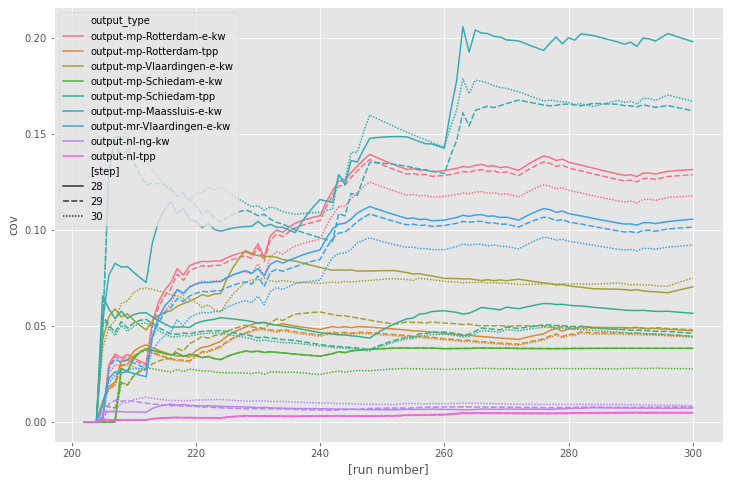

In [148]:
x = '[run number]'
y = 'cov'
sns.lineplot(x=x, y=y, err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps)
#sns.lineplot(x=x, y=y, err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'] == 'output-mr-Vlaardingen-e-kw'])

In [298]:
df_cov_steps.dtypes

[run number]      int64
[step]            int64
output_type      object
output          float64
stdev           float64
mean            float64
cov             float64
dtype: object

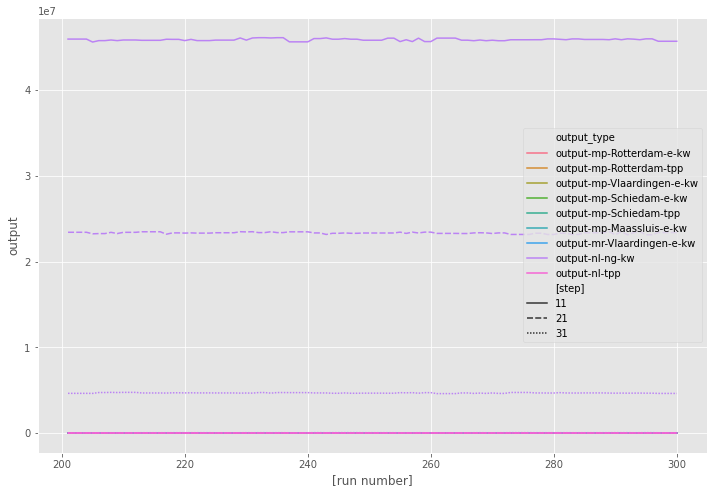

In [123]:
x = '[run number]'
y = 'output'
sns.lineplot(x=x, y=y, err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps)
#sns.lineplot(x=x, y=y, err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'] == 'output-mp-Rotterdam-e-kw'])

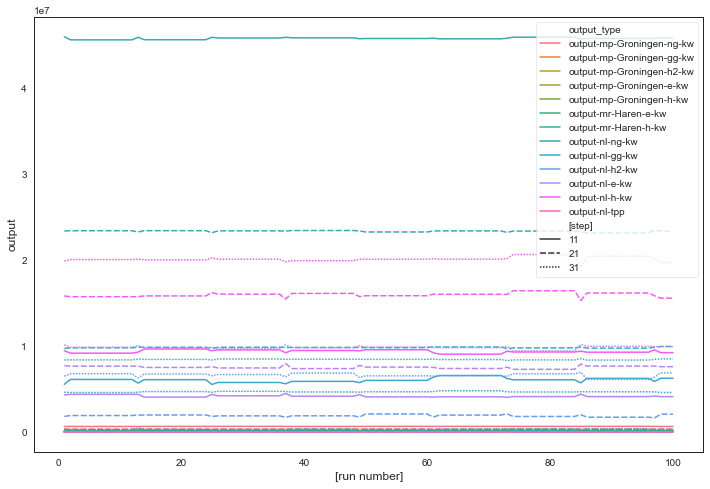

In [227]:
x = '[run number]'
y = 'output'
sns.lineplot(x=x, y=y, err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps)
#sns.lineplot(x=x, y=y, err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'] == 'output-mp-Rotterdam-tpp'])

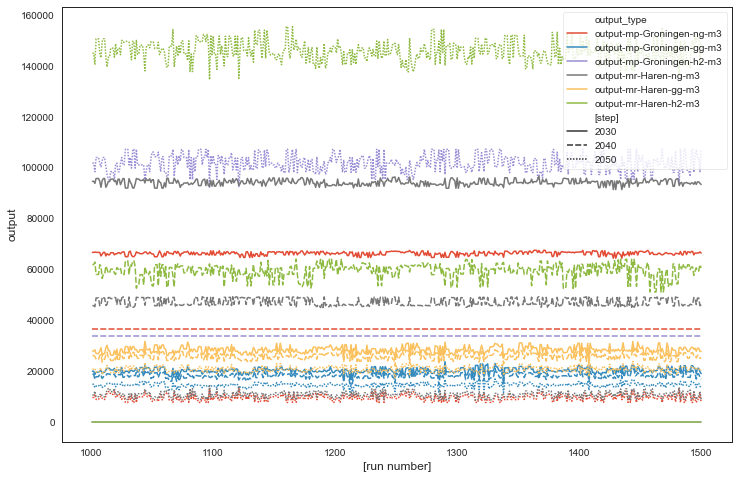

In [297]:
strategy = 2
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-m3',
    'output-mp-Groningen-gg-m3',
    'output-mp-Groningen-h2-m3',
    'output-mr-Haren-ng-m3',
    'output-mr-Haren-gg-m3',
    'output-mr-Haren-h2-m3',
    #'output-nl-ng-m3',
    #'output-nl-gg-m3',
    #'output-nl-h2-m3',
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]
df_strat0['[run number]'] = df_strat0['[run number]']
df_strat0['[step]'] = df_strat0['[step]'] + 2019

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 2030) | (df_cov['[step]'] == 2040) | (df_cov['[step]'] == 2050)]

x = '[run number]'
y = 'output'


sns.set_style = ("white")

sns.lineplot(x=x, y=y, err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-') ])

plt.legend(loc='upper right')

/Users/jaromirbogdanovski/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


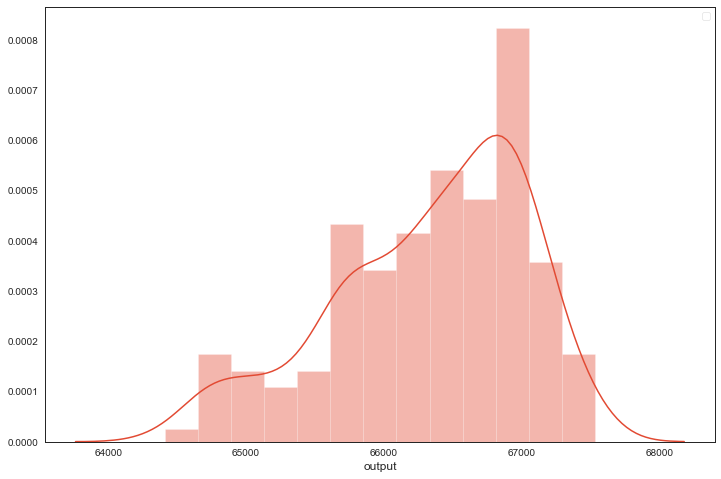

In [312]:
strategy = 2
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-m3',
    'output-mp-Groningen-gg-m3',
    'output-mp-Groningen-h2-m3',
    'output-mr-Haren-ng-m3',
    'output-mr-Haren-gg-m3',
    'output-mr-Haren-h2-m3',
    #'output-nl-ng-m3',
    #'output-nl-gg-m3',
    #'output-nl-h2-m3',
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]
df_strat0['[run number]'] = df_strat0['[run number]']
df_strat0['[step]'] = df_strat0['[step]'] + 2019

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 2030) | (df_cov['[step]'] == 2040) | (df_cov['[step]'] == 2050)]

x = '[run number]'
y = 'output'


sns.set_style = ("white")

sns.distplot(df_cov['output'][(df_cov['[step]'] == 2030) & (df_cov['output_type'] == 'output-mp-Groningen-ng-m3')], norm_hist = True)

plt.legend(loc='upper right')

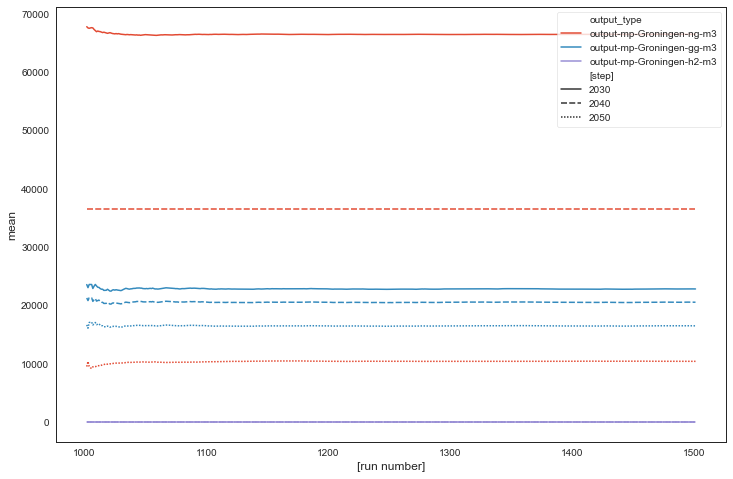

In [296]:
# strategy 2; M3 plot main text

strategy = 4
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-m3',
    'output-mp-Groningen-gg-m3',
    'output-mp-Groningen-h2-m3',
    'output-mr-Haren-ng-m3',
    'output-mr-Haren-gg-m3',
    'output-mr-Haren-h2-m3',
    'output-nl-ng-m3',
    'output-nl-gg-m3',
    'output-nl-h2-m3',
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]
df_strat0['[run number]'] = df_strat0['[run number]'] - 999
df_strat0['[step]'] = df_strat0['[step]'] + 2019

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 2030) | (df_cov['[step]'] == 2040) | (df_cov['[step]'] == 2050)]

x = '[run number]'
y = 'mean'


sns.set_style = ("white")

sns.lineplot(x=x, y=y, err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mp') ])

plt.legend(loc='upper right')

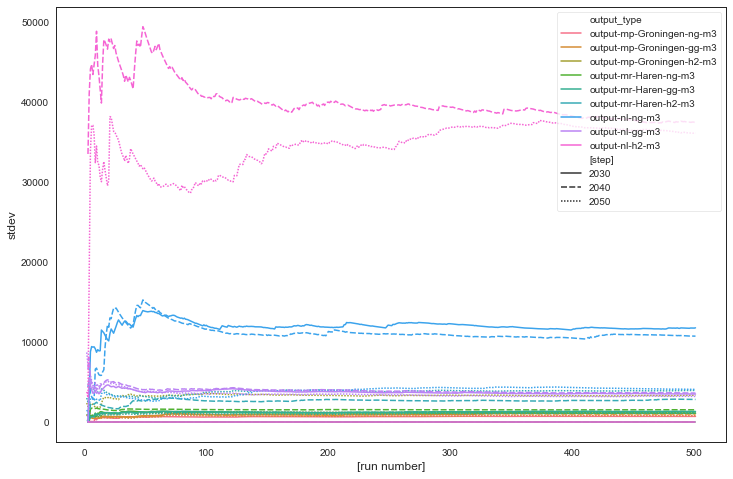

In [277]:
# strategy 2; M3 plot main text

strategy = 2
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-m3',
    'output-mp-Groningen-gg-m3',
    'output-mp-Groningen-h2-m3',
    'output-mr-Haren-ng-m3',
    'output-mr-Haren-gg-m3',
    'output-mr-Haren-h2-m3',
    'output-nl-ng-m3',
    'output-nl-gg-m3',
    'output-nl-h2-m3',
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]
df_strat0['[run number]'] = df_strat0['[run number]'] - 999
df_strat0['[step]'] = df_strat0['[step]'] + 2019

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 2030) | (df_cov['[step]'] == 2040) | (df_cov['[step]'] == 2050)]

x = '[run number]'
y = 'stdev'


sns.set_style = ("white")

sns.lineplot(x=x, y=y, err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-') ])

plt.legend(loc='upper right')

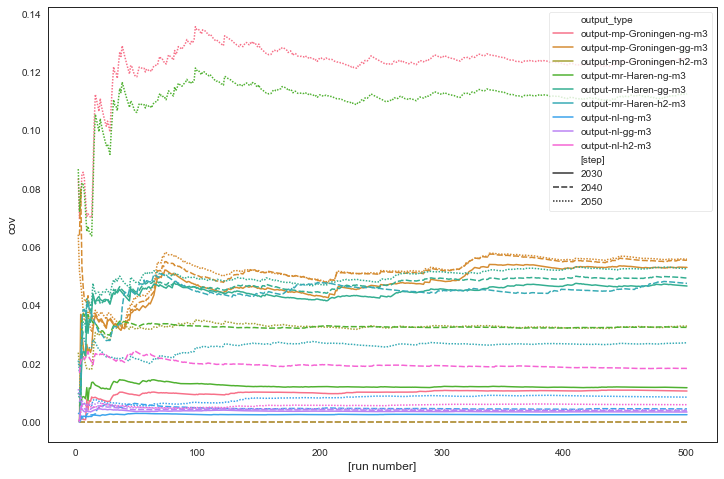

In [275]:
# strategy 2; M3 plot main text

strategy = 2
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-m3',
    'output-mp-Groningen-gg-m3',
    'output-mp-Groningen-h2-m3',
    'output-mr-Haren-ng-m3',
    'output-mr-Haren-gg-m3',
    'output-mr-Haren-h2-m3',
    'output-nl-ng-m3',
    'output-nl-gg-m3',
    'output-nl-h2-m3',
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]
df_strat0['[run number]'] = df_strat0['[run number]'] - 999
df_strat0['[step]'] = df_strat0['[step]'] + 2019

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 2030) | (df_cov['[step]'] == 2040) | (df_cov['[step]'] == 2050)]

x = '[run number]'
y = 'cov'


sns.set_style = ("white")

sns.lineplot(x=x, y=y, err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-') ])

plt.legend(loc='upper right')
#plt.title('Coefficient ', fontsize = 20)
#plt.savefig('var_test_500runs_maintext.png', dpi=400)

Text(0.5, 0.98, 'MP-level; Strategy 0')

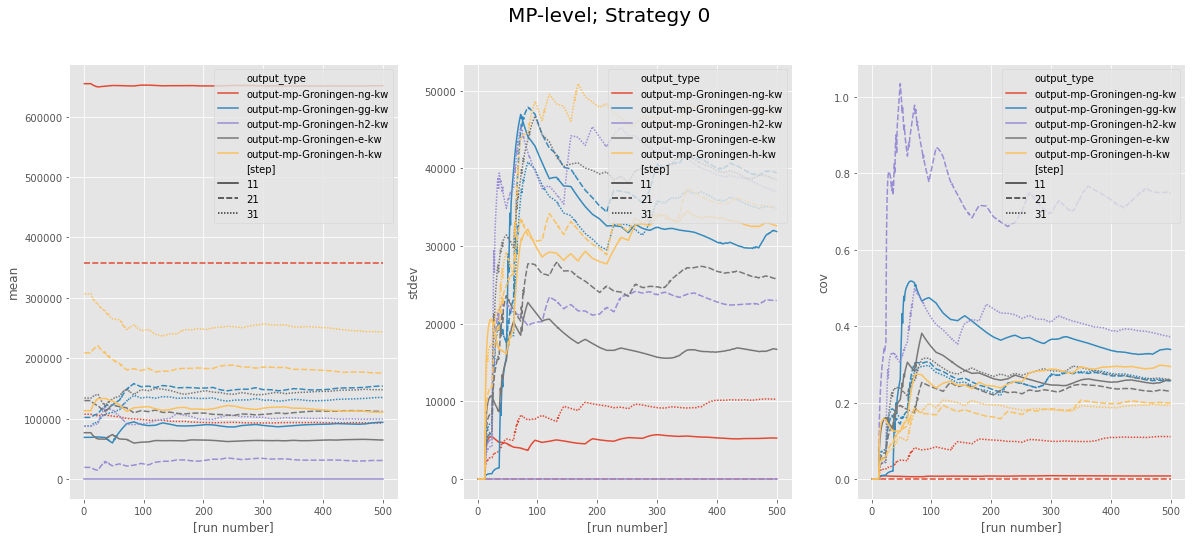

In [23]:
# strategy 0; MP level plot

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,8))

strategy = 0
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-kw',
    'output-mp-Groningen-gg-kw',
    'output-mp-Groningen-h2-kw',
    'output-mp-Groningen-e-kw',
    'output-mp-Groningen-h-kw',
    #'output-mr-Haren-ng-kw',
    #'output-mr-Haren-gg-kw',
    #'output-mr-Haren-h2-kw',
    'output-mr-Haren-e-kw',
    'output-mr-Haren-h-kw',
    'output-nl-ng-kw',
    'output-nl-gg-kw',
    'output-nl-h2-kw',
    'output-nl-e-kw',
    'output-nl-h-kw',
    'output-nl-tpp'
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 11) | (df_cov['[step]'] == 21) | (df_cov['[step]'] == 31)]

x = '[run number]'


sns.set_style = ("white")

sns.lineplot(ax = ax1, x=x, y='mean', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mp') ])
sns.lineplot(ax = ax2, x=x, y='stdev', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mp') ])
sns.lineplot(ax = ax3, x=x, y='cov', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mp') ])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
fig.suptitle('MP-level; Strategy 0', fontsize = 20)

Text(0.5, 0.98, 'MR-level; Strategy 0')

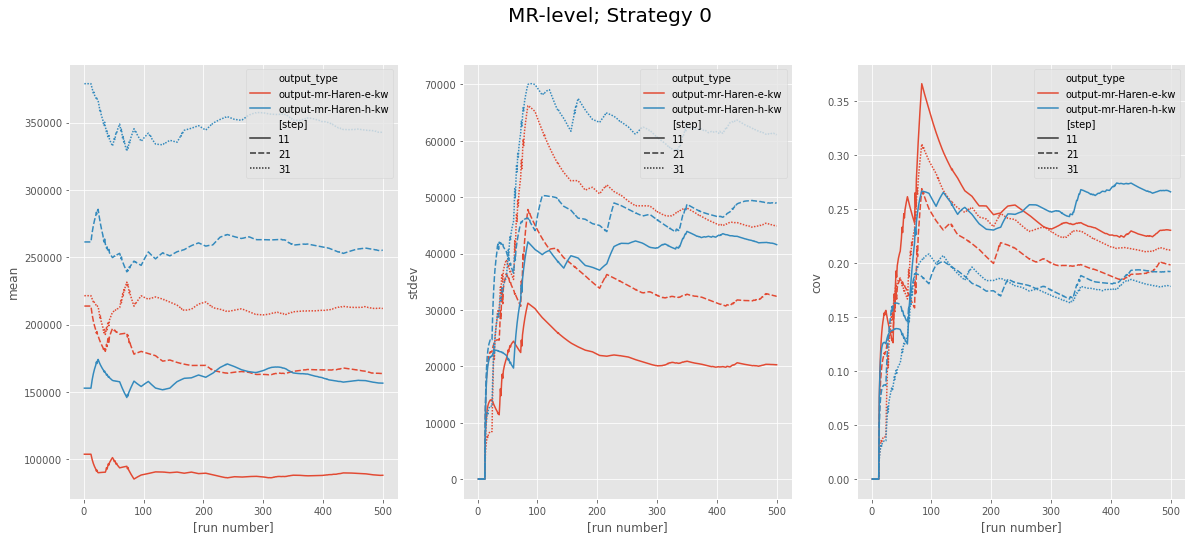

In [24]:
# strategy 0; MR level plot

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,8))

strategy = 0
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-kw',
    'output-mp-Groningen-gg-kw',
    'output-mp-Groningen-h2-kw',
    'output-mp-Groningen-e-kw',
    'output-mp-Groningen-h-kw',
    #'output-mr-Haren-ng-kw',
    #'output-mr-Haren-gg-kw',
    #'output-mr-Haren-h2-kw',
    'output-mr-Haren-e-kw',
    'output-mr-Haren-h-kw',
    'output-nl-ng-kw',
    'output-nl-gg-kw',
    'output-nl-h2-kw',
    'output-nl-e-kw',
    'output-nl-h-kw',
    'output-nl-tpp'
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 11) | (df_cov['[step]'] == 21) | (df_cov['[step]'] == 31)]

x = '[run number]'


sns.set_style = ("white")

sns.lineplot(ax = ax1, x=x, y='mean', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mr') ])
sns.lineplot(ax = ax2, x=x, y='stdev', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mr') ])
sns.lineplot(ax = ax3, x=x, y='cov', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mr') ])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
fig.suptitle('MR-level; Strategy 0', fontsize = 20)

Text(0.5, 0.98, 'NL-level; Strategy 0')

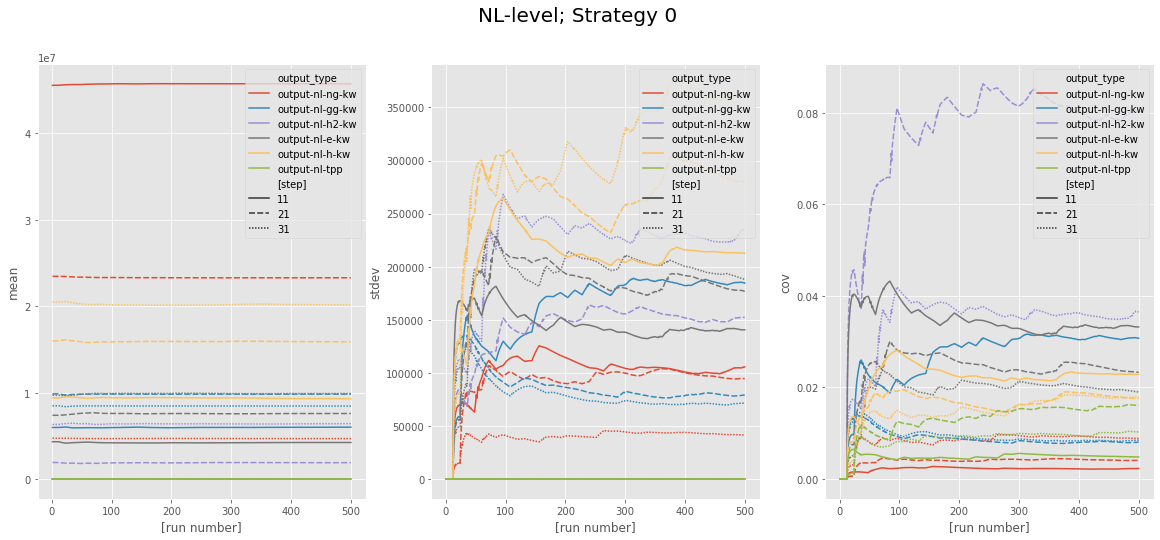

In [25]:
# strategy 0; NL level plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,8))

strategy = 0
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-kw',
    'output-mp-Groningen-gg-kw',
    'output-mp-Groningen-h2-kw',
    'output-mp-Groningen-e-kw',
    'output-mp-Groningen-h-kw',
    #'output-mr-Haren-ng-kw',
    #'output-mr-Haren-gg-kw',
    #'output-mr-Haren-h2-kw',
    'output-mr-Haren-e-kw',
    'output-mr-Haren-h-kw',
    'output-nl-ng-kw',
    'output-nl-gg-kw',
    'output-nl-h2-kw',
    'output-nl-e-kw',
    'output-nl-h-kw',
    'output-nl-tpp'
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 11) | (df_cov['[step]'] == 21) | (df_cov['[step]'] == 31)]

x = '[run number]'


sns.set_style = ("white")

sns.lineplot(ax = ax1, x=x, y='mean', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-nl') ])
sns.lineplot(ax = ax2, x=x, y='stdev', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-nl') ])
sns.lineplot(ax = ax3, x=x, y='cov', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-nl') ])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
fig.suptitle('NL-level; Strategy 0', fontsize = 20)

Text(0.5, 0.98, 'MP-level; Strategy 1')

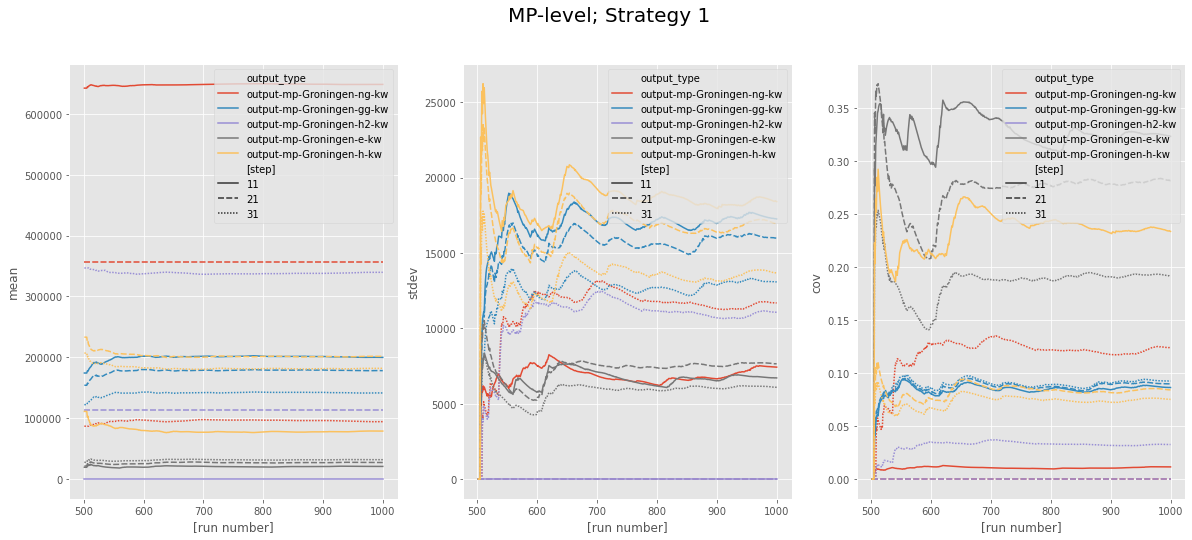

In [29]:
# strategy 1; MP level plot

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,8))

strategy = 1
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-kw',
    'output-mp-Groningen-gg-kw',
    'output-mp-Groningen-h2-kw',
    'output-mp-Groningen-e-kw',
    'output-mp-Groningen-h-kw',
    #'output-mr-Haren-ng-kw',
    #'output-mr-Haren-gg-kw',
    #'output-mr-Haren-h2-kw',
    'output-mr-Haren-e-kw',
    'output-mr-Haren-h-kw',
    'output-nl-ng-kw',
    'output-nl-gg-kw',
    'output-nl-h2-kw',
    'output-nl-e-kw',
    'output-nl-h-kw',
    'output-nl-tpp'
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 11) | (df_cov['[step]'] == 21) | (df_cov['[step]'] == 31)]

x = '[run number]'


sns.set_style = ("white")

sns.lineplot(ax = ax1, x=x, y='mean', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mp') ])
sns.lineplot(ax = ax2, x=x, y='stdev', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mp') ])
sns.lineplot(ax = ax3, x=x, y='cov', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mp') ])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
fig.suptitle('MP-level; Strategy 1', fontsize = 20)

Text(0.5, 0.98, 'MR-level; Strategy 1')

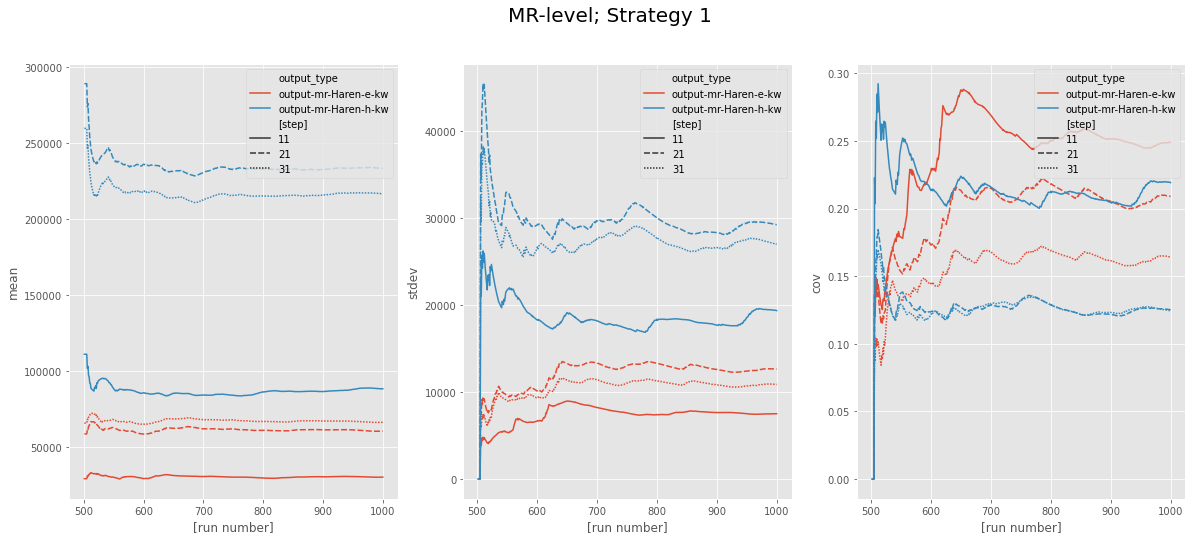

In [30]:
# strategy 1; MR level plot

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,8))

strategy = 1
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-kw',
    'output-mp-Groningen-gg-kw',
    'output-mp-Groningen-h2-kw',
    'output-mp-Groningen-e-kw',
    'output-mp-Groningen-h-kw',
    #'output-mr-Haren-ng-kw',
    #'output-mr-Haren-gg-kw',
    #'output-mr-Haren-h2-kw',
    'output-mr-Haren-e-kw',
    'output-mr-Haren-h-kw',
    'output-nl-ng-kw',
    'output-nl-gg-kw',
    'output-nl-h2-kw',
    'output-nl-e-kw',
    'output-nl-h-kw',
    'output-nl-tpp'
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 11) | (df_cov['[step]'] == 21) | (df_cov['[step]'] == 31)]

x = '[run number]'


sns.set_style = ("white")

sns.lineplot(ax = ax1, x=x, y='mean', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mr') ])
sns.lineplot(ax = ax2, x=x, y='stdev', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mr') ])
sns.lineplot(ax = ax3, x=x, y='cov', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mr') ])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
fig.suptitle('MR-level; Strategy 1', fontsize = 20)

Text(0.5, 0.98, 'NL-level; Strategy 1')

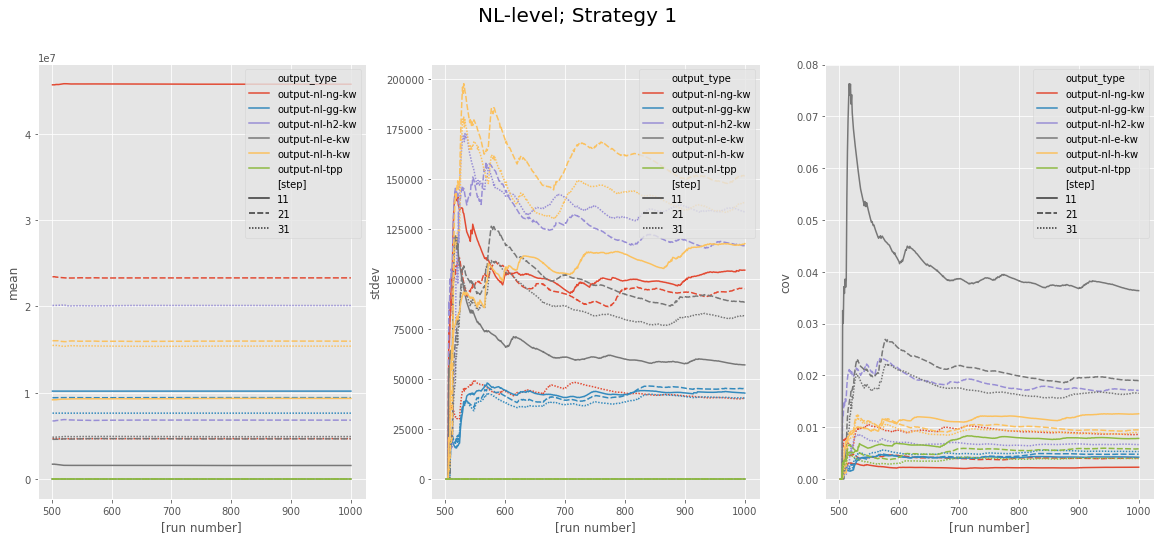

In [39]:
# strategy 1; NL level plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,8))

strategy = 1
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-kw',
    'output-mp-Groningen-gg-kw',
    'output-mp-Groningen-h2-kw',
    'output-mp-Groningen-e-kw',
    'output-mp-Groningen-h-kw',
    #'output-mr-Haren-ng-kw',
    #'output-mr-Haren-gg-kw',
    #'output-mr-Haren-h2-kw',
    'output-mr-Haren-e-kw',
    'output-mr-Haren-h-kw',
    'output-nl-ng-kw',
    'output-nl-gg-kw',
    'output-nl-h2-kw',
    'output-nl-e-kw',
    'output-nl-h-kw',
    'output-nl-tpp'
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 11) | (df_cov['[step]'] == 21) | (df_cov['[step]'] == 31)]

x = '[run number]'


sns.set_style = ("white")

sns.lineplot(ax = ax1, x=x, y='mean', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-nl') ])
sns.lineplot(ax = ax2, x=x, y='stdev', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-nl') ])
sns.lineplot(ax = ax3, x=x, y='cov', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-nl') ])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
fig.suptitle('NL-level; Strategy 1', fontsize = 20)

Text(0.5, 0.98, 'MP-level; Strategy 2')

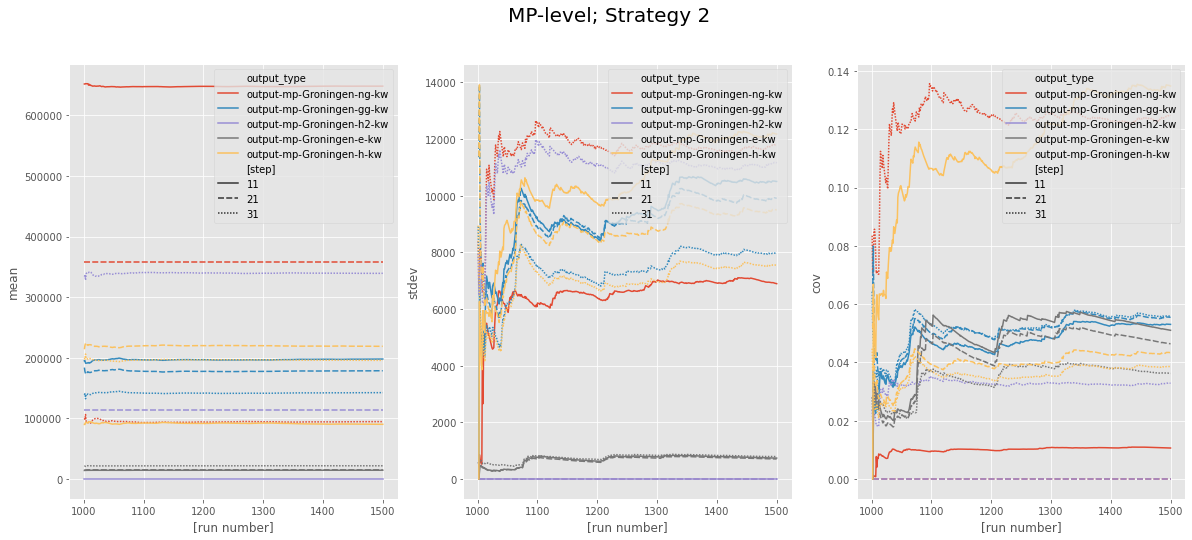

In [36]:
# strategy 2; MP level plot

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,8))

strategy = 2
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-kw',
    'output-mp-Groningen-gg-kw',
    'output-mp-Groningen-h2-kw',
    'output-mp-Groningen-e-kw',
    'output-mp-Groningen-h-kw',
    #'output-mr-Haren-ng-kw',
    #'output-mr-Haren-gg-kw',
    #'output-mr-Haren-h2-kw',
    'output-mr-Haren-e-kw',
    'output-mr-Haren-h-kw',
    'output-nl-ng-kw',
    'output-nl-gg-kw',
    'output-nl-h2-kw',
    'output-nl-e-kw',
    'output-nl-h-kw',
    'output-nl-tpp'
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 11) | (df_cov['[step]'] == 21) | (df_cov['[step]'] == 31)]

x = '[run number]'


sns.set_style = ("white")

sns.lineplot(ax = ax1, x=x, y='mean', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mp') ])
sns.lineplot(ax = ax2, x=x, y='stdev', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mp') ])
sns.lineplot(ax = ax3, x=x, y='cov', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mp') ])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
fig.suptitle('MP-level; Strategy 2', fontsize = 20)

Text(0.5, 0.98, 'MR-level; Strategy 2')

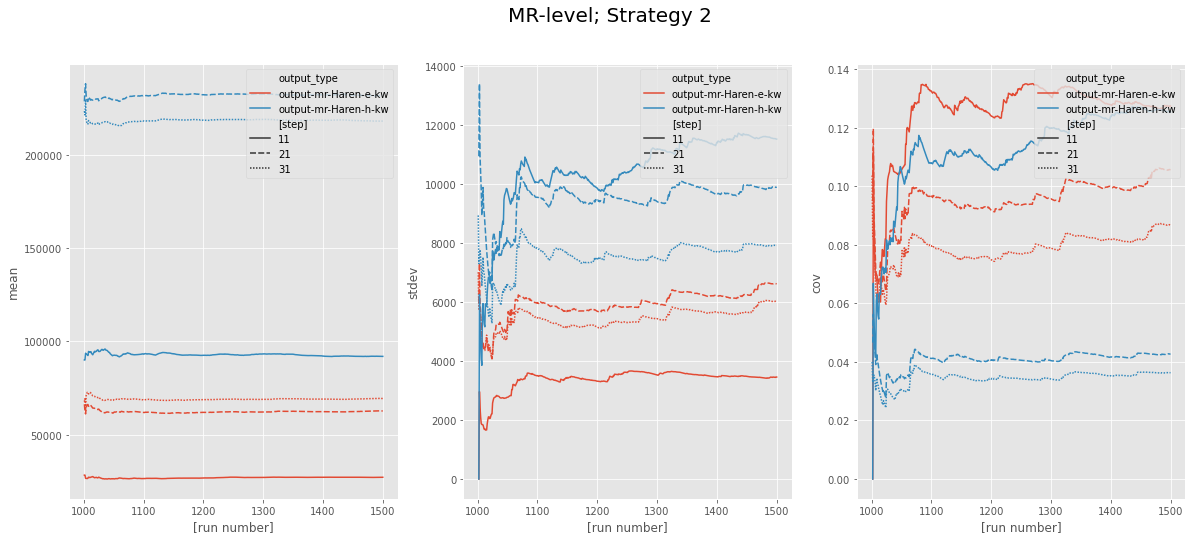

In [40]:
# strategy 2; MR level plot

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,8))

strategy = 2
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-kw',
    'output-mp-Groningen-gg-kw',
    'output-mp-Groningen-h2-kw',
    'output-mp-Groningen-e-kw',
    'output-mp-Groningen-h-kw',
    #'output-mr-Haren-ng-kw',
    #'output-mr-Haren-gg-kw',
    #'output-mr-Haren-h2-kw',
    'output-mr-Haren-e-kw',
    'output-mr-Haren-h-kw',
    'output-nl-ng-kw',
    'output-nl-gg-kw',
    'output-nl-h2-kw',
    'output-nl-e-kw',
    'output-nl-h-kw',
    'output-nl-tpp'
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 11) | (df_cov['[step]'] == 21) | (df_cov['[step]'] == 31)]

x = '[run number]'


sns.set_style = ("white")

sns.lineplot(ax = ax1, x=x, y='mean', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mr') ])
sns.lineplot(ax = ax2, x=x, y='stdev', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mr') ])
sns.lineplot(ax = ax3, x=x, y='cov', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mr') ])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
fig.suptitle('MR-level; Strategy 2', fontsize = 20)

Text(0.5, 0.98, 'NL-level; Strategy 2')

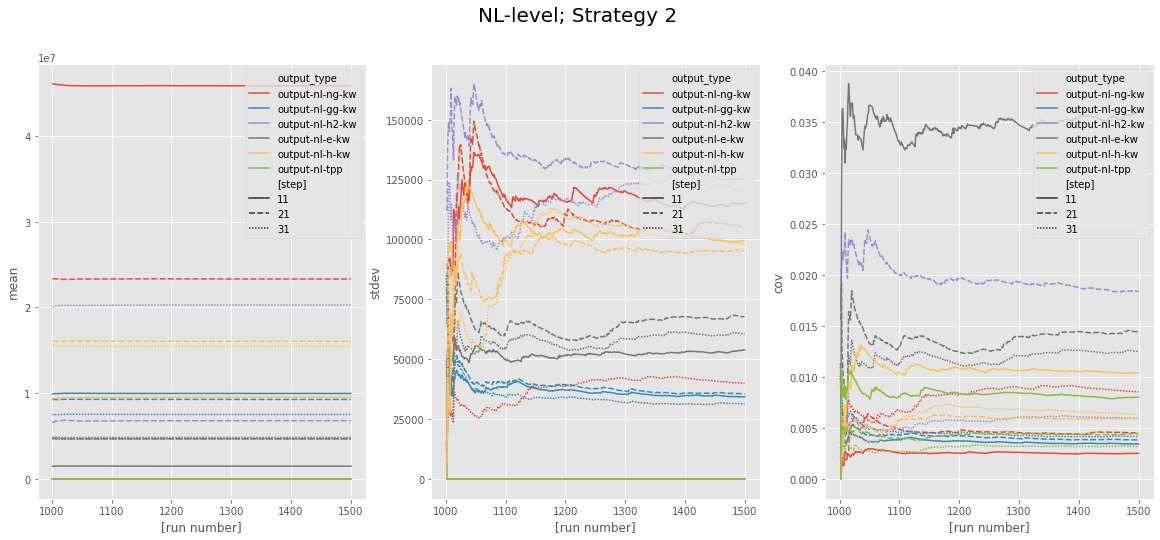

In [33]:
# strategy 2; NL level plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,8))

strategy = 2
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-kw',
    'output-mp-Groningen-gg-kw',
    'output-mp-Groningen-h2-kw',
    'output-mp-Groningen-e-kw',
    'output-mp-Groningen-h-kw',
    #'output-mr-Haren-ng-kw',
    #'output-mr-Haren-gg-kw',
    #'output-mr-Haren-h2-kw',
    'output-mr-Haren-e-kw',
    'output-mr-Haren-h-kw',
    'output-nl-ng-kw',
    'output-nl-gg-kw',
    'output-nl-h2-kw',
    'output-nl-e-kw',
    'output-nl-h-kw',
    'output-nl-tpp'
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 11) | (df_cov['[step]'] == 21) | (df_cov['[step]'] == 31)]

x = '[run number]'


sns.set_style = ("white")

sns.lineplot(ax = ax1, x=x, y='mean', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-nl') ])
sns.lineplot(ax = ax2, x=x, y='stdev', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-nl') ])
sns.lineplot(ax = ax3, x=x, y='cov', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-nl') ])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
fig.suptitle('NL-level; Strategy 2', fontsize = 20)

Text(0.5, 0.98, 'MP-level; Strategy 3')

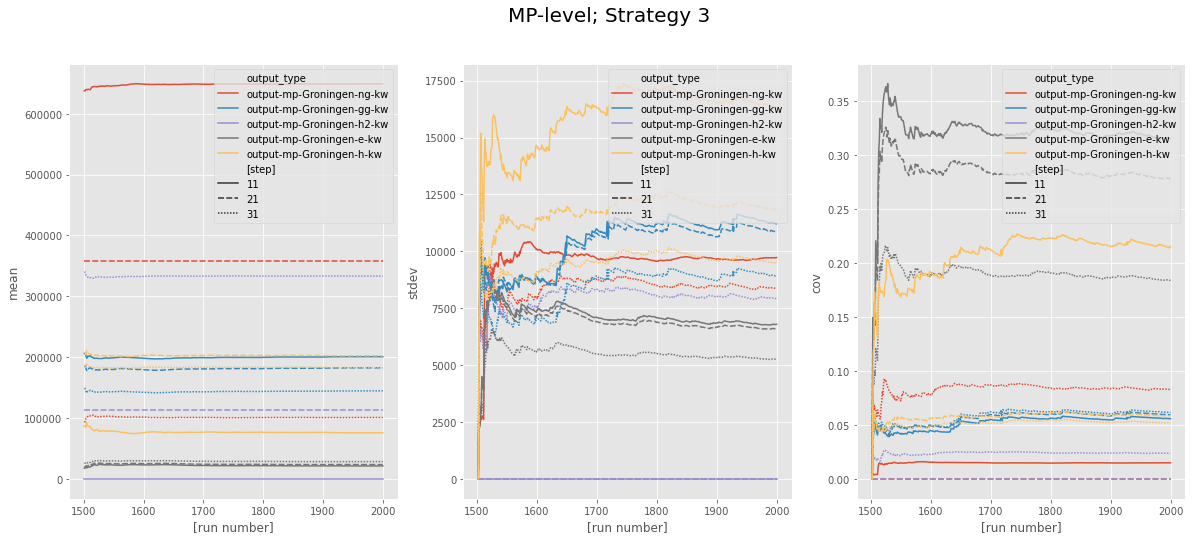

In [37]:
# strategy 3; MP level plot

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,8))

strategy = 3
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-kw',
    'output-mp-Groningen-gg-kw',
    'output-mp-Groningen-h2-kw',
    'output-mp-Groningen-e-kw',
    'output-mp-Groningen-h-kw',
    #'output-mr-Haren-ng-kw',
    #'output-mr-Haren-gg-kw',
    #'output-mr-Haren-h2-kw',
    'output-mr-Haren-e-kw',
    'output-mr-Haren-h-kw',
    'output-nl-ng-kw',
    'output-nl-gg-kw',
    'output-nl-h2-kw',
    'output-nl-e-kw',
    'output-nl-h-kw',
    'output-nl-tpp'
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 11) | (df_cov['[step]'] == 21) | (df_cov['[step]'] == 31)]

x = '[run number]'


sns.set_style = ("white")

sns.lineplot(ax = ax1, x=x, y='mean', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mp') ])
sns.lineplot(ax = ax2, x=x, y='stdev', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mp') ])
sns.lineplot(ax = ax3, x=x, y='cov', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mp') ])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
fig.suptitle('MP-level; Strategy 3', fontsize = 20)

Text(0.5, 0.98, 'MR-level; Strategy 3')

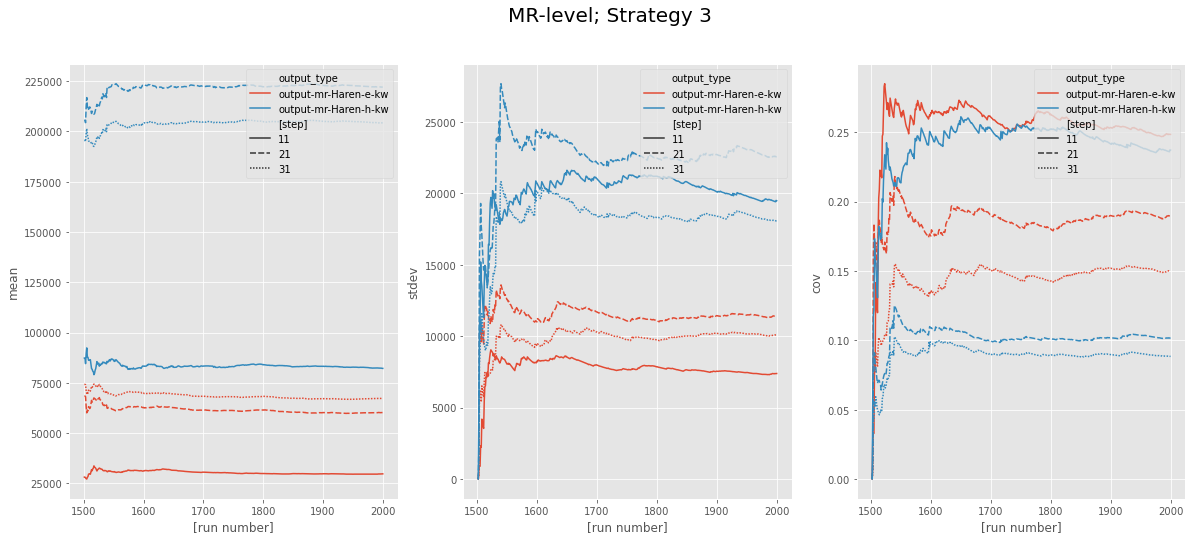

In [41]:
# strategy 3; MR level plot

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,8))

strategy = 3
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-kw',
    'output-mp-Groningen-gg-kw',
    'output-mp-Groningen-h2-kw',
    'output-mp-Groningen-e-kw',
    'output-mp-Groningen-h-kw',
    #'output-mr-Haren-ng-kw',
    #'output-mr-Haren-gg-kw',
    #'output-mr-Haren-h2-kw',
    'output-mr-Haren-e-kw',
    'output-mr-Haren-h-kw',
    'output-nl-ng-kw',
    'output-nl-gg-kw',
    'output-nl-h2-kw',
    'output-nl-e-kw',
    'output-nl-h-kw',
    'output-nl-tpp'
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 11) | (df_cov['[step]'] == 21) | (df_cov['[step]'] == 31)]

x = '[run number]'


sns.set_style = ("white")

sns.lineplot(ax = ax1, x=x, y='mean', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mr') ])
sns.lineplot(ax = ax2, x=x, y='stdev', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mr') ])
sns.lineplot(ax = ax3, x=x, y='cov', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mr') ])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
fig.suptitle('MR-level; Strategy 3', fontsize = 20)

TypeError: 'str' object is not callable

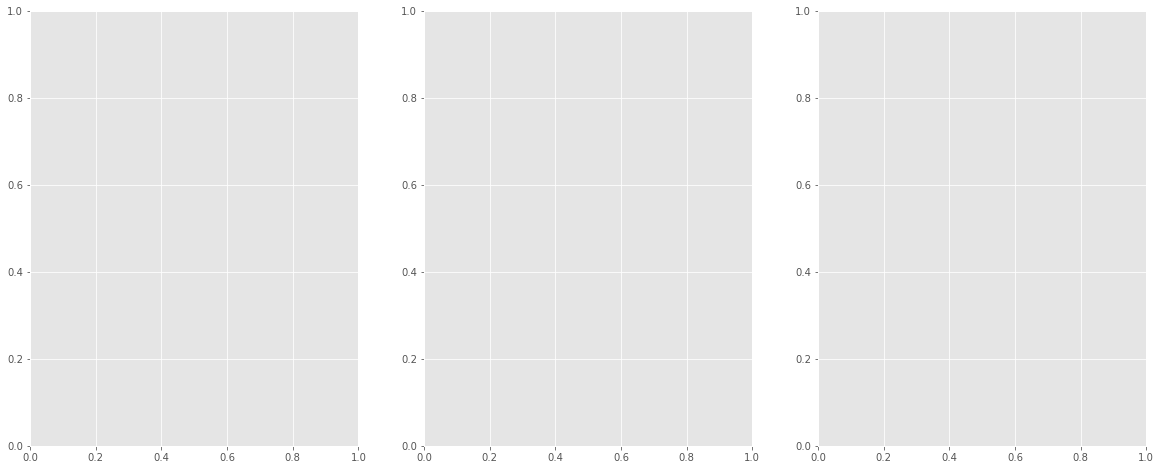

In [45]:
# strategy 3; NL level plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,8))

strategy = 3
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-kw',
    'output-mp-Groningen-gg-kw',
    'output-mp-Groningen-h2-kw',
    'output-mp-Groningen-e-kw',
    'output-mp-Groningen-h-kw',
    #'output-mr-Haren-ng-kw',
    #'output-mr-Haren-gg-kw',
    #'output-mr-Haren-h2-kw',
    'output-mr-Haren-e-kw',
    'output-mr-Haren-h-kw',
    'output-nl-ng-kw',
    'output-nl-gg-kw',
    'output-nl-h2-kw',
    'output-nl-e-kw',
    'output-nl-h-kw',
    'output-nl-tpp'
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 11) | (df_cov['[step]'] == 21) | (df_cov['[step]'] == 31)]

x = '[run number]'


sns.set_style = ("white")

sns.lineplot(ax = ax1, x=x, y='mean', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-nl') ])
sns.lineplot(ax = ax2, x=x, y='stdev', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-nl') ])
sns.lineplot(ax = ax3, x=x, y='cov', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-nl') ])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
fig.suptitle('NL-level; Strategy 3', fontsize = 20)

Text(0.5, 0.98, 'MP-level; Strategy 4')

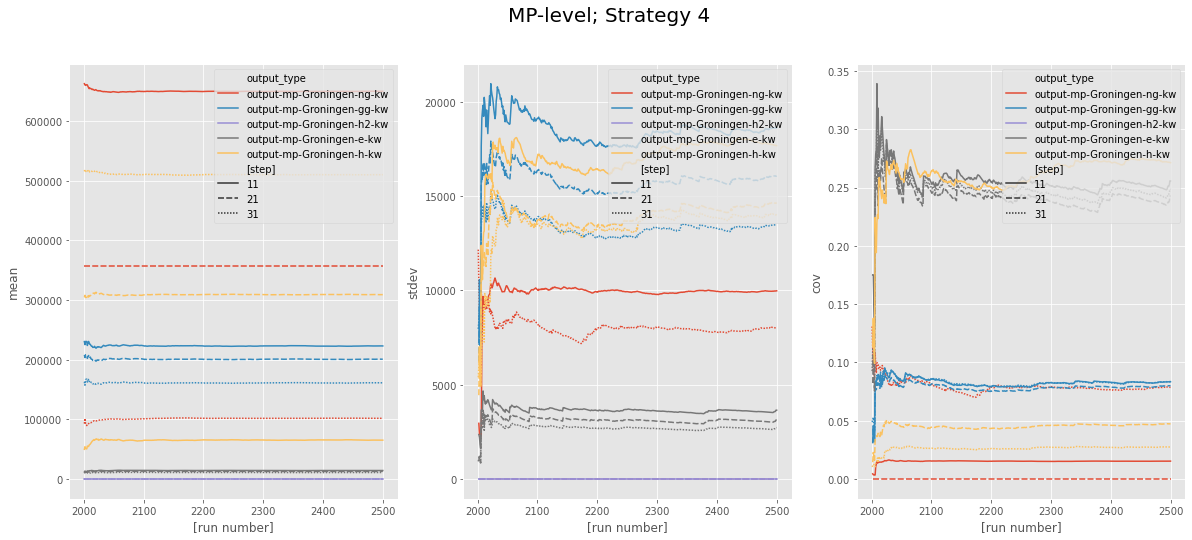

In [38]:
# strategy 4; MP level plot

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,8))

strategy = 4
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-kw',
    'output-mp-Groningen-gg-kw',
    'output-mp-Groningen-h2-kw',
    'output-mp-Groningen-e-kw',
    'output-mp-Groningen-h-kw',
    #'output-mr-Haren-ng-kw',
    #'output-mr-Haren-gg-kw',
    #'output-mr-Haren-h2-kw',
    'output-mr-Haren-e-kw',
    'output-mr-Haren-h-kw',
    'output-nl-ng-kw',
    'output-nl-gg-kw',
    'output-nl-h2-kw',
    'output-nl-e-kw',
    'output-nl-h-kw',
    'output-nl-tpp'
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 11) | (df_cov['[step]'] == 21) | (df_cov['[step]'] == 31)]

x = '[run number]'


sns.set_style = ("white")

sns.lineplot(ax = ax1, x=x, y='mean', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mp') ])
sns.lineplot(ax = ax2, x=x, y='stdev', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mp') ])
sns.lineplot(ax = ax3, x=x, y='cov', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mp') ])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
fig.suptitle('MP-level; Strategy 4', fontsize = 20)

Text(0.5, 0.98, 'MR-level; Strategy 4')

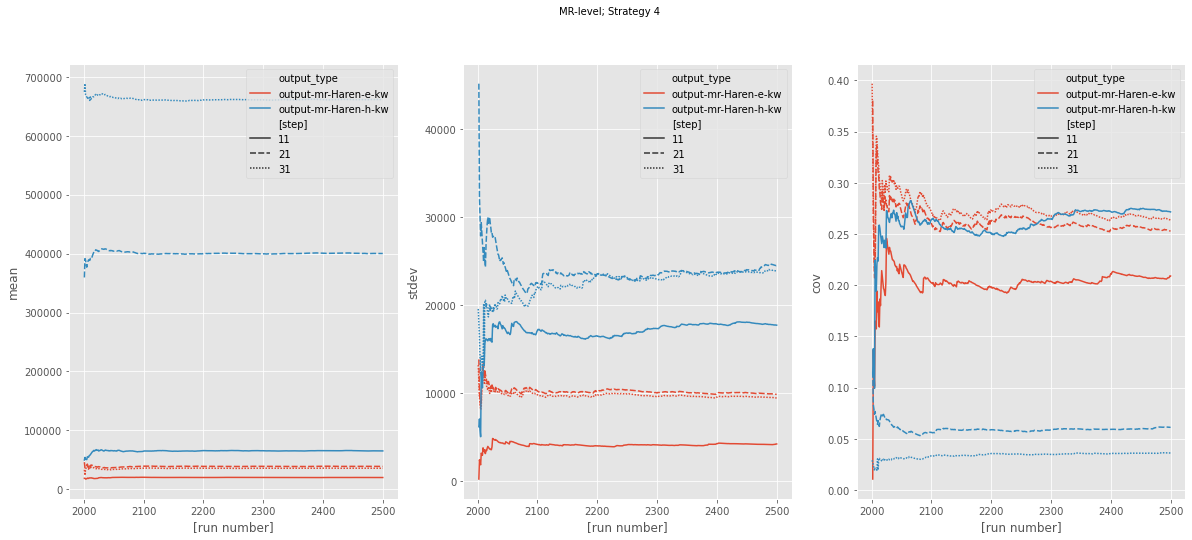

In [43]:
# strategy 4; MR level plot

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,8))

strategy = 4
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-kw',
    'output-mp-Groningen-gg-kw',
    'output-mp-Groningen-h2-kw',
    'output-mp-Groningen-e-kw',
    'output-mp-Groningen-h-kw',
    #'output-mr-Haren-ng-kw',
    #'output-mr-Haren-gg-kw',
    #'output-mr-Haren-h2-kw',
    'output-mr-Haren-e-kw',
    'output-mr-Haren-h-kw',
    'output-nl-ng-kw',
    'output-nl-gg-kw',
    'output-nl-h2-kw',
    'output-nl-e-kw',
    'output-nl-h-kw',
    'output-nl-tpp'
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 11) | (df_cov['[step]'] == 21) | (df_cov['[step]'] == 31)]

x = '[run number]'


sns.set_style = ("white")

sns.lineplot(ax = ax1, x=x, y='mean', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mr') ])
sns.lineplot(ax = ax2, x=x, y='stdev', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mr') ])
sns.lineplot(ax = ax3, x=x, y='cov', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-mr') ])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
fig.suptitle('MR-level; Strategy 4', fontsize = 20)

Text(0.5, 0.98, 'NL-level; Strategy 4')

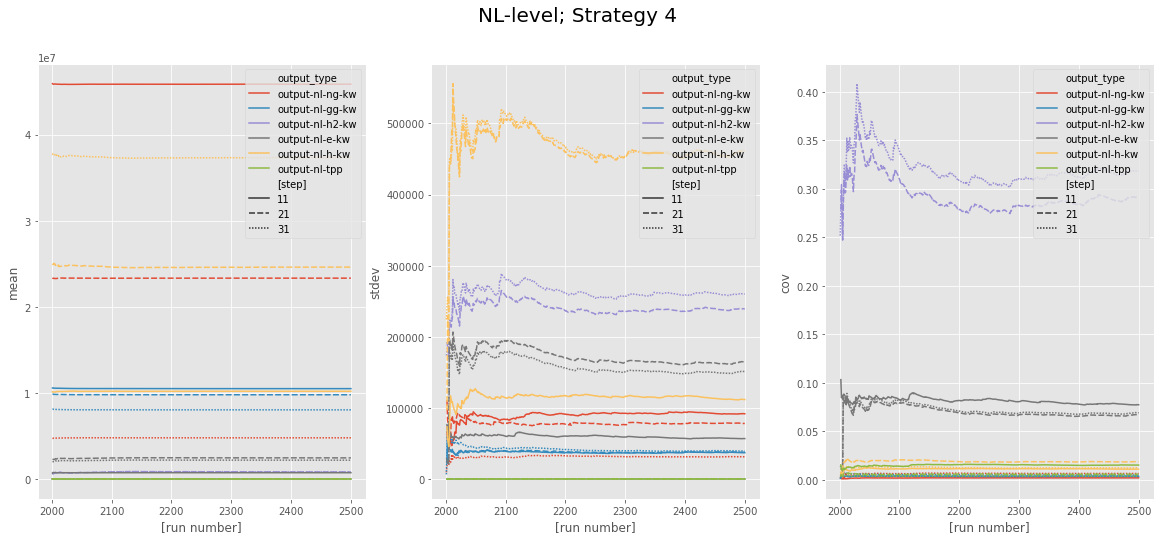

In [35]:
# strategy 4; NL level plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,8))

strategy = 4
columns = [
    '[run number]',
    '[step]',
    'output-mp-Groningen-ng-kw',
    'output-mp-Groningen-gg-kw',
    'output-mp-Groningen-h2-kw',
    'output-mp-Groningen-e-kw',
    'output-mp-Groningen-h-kw',
    #'output-mr-Haren-ng-kw',
    #'output-mr-Haren-gg-kw',
    #'output-mr-Haren-h2-kw',
    'output-mr-Haren-e-kw',
    'output-mr-Haren-h-kw',
    'output-nl-ng-kw',
    'output-nl-gg-kw',
    'output-nl-h2-kw',
    'output-nl-e-kw',
    'output-nl-h-kw',
    'output-nl-tpp'
]

df_strat0 = df_var_test[df_var_test['mp-transition-strategy'] == strategy]
df_strat0 = df_strat0[columns]

df_cov = df_strat0.melt(id_vars = ['[run number]', '[step]'], var_name = 'output_type', value_name = 'output' )
df_cov['stdev'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().std())
df_cov['mean'] = df_cov.groupby(['output_type', '[step]'])['output'].apply(lambda x: x.expanding().mean())

df_cov['cov'] = df_cov['stdev'] / df_cov['mean']

df_cov_steps = df_cov[(df_cov['[step]'] == 11) | (df_cov['[step]'] == 21) | (df_cov['[step]'] == 31)]

x = '[run number]'


sns.set_style = ("white")

sns.lineplot(ax = ax1, x=x, y='mean', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-nl') ])
sns.lineplot(ax = ax2, x=x, y='stdev', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-nl') ])
sns.lineplot(ax = ax3, x=x, y='cov', err_style = "band", style = '[step]', hue = 'output_type', data = df_cov_steps[df_cov_steps['output_type'].str.contains('output-nl') ])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
fig.suptitle('NL-level; Strategy 4', fontsize = 20)